<i>Johdanto datatieteeseen TIJO.222</i> <br>
<i>Rasmus Karppinen H275376</i>
<hr>

# Oppimispäiväkirja
<br>

#### Oppimistavoitteet

Datan parissa työskentely on kiinnostanut minua työuraa ajatellen, ja kurssin esitteen perusteella uskon saavani tästä tärkeää oppia tulevaisuutta ajatellen. Olen kuullut myös muutamilta vanhemmilta opiskelijoilta tämän olevan hyvä ja hyödyllinen kurssi. Joillakin aiemmilla kursseilla data-analytiikkaa liiketoiminnan apuvälineenä on jo käsitelty, mutta vielä melko pintapuolisesti, joten toivoisinkin saavani syvempää ymmärrystä analytiikasta teorian, menetelmien, toimintamallien ja hyödyntämisen tasolla. Koska data-analytiikan työkalujakaan ei ole aiemmilla kursseilla kovinkaan laajasti hyödynnetty, erityisesti pythonin ja sen kirjastojen käytöstä data-analytiikassa olen kiinnostunut oppimaan.

## Luento 1



#### Kehityskohteita

Kurssilla esitellään monia työkaluja ja ohjelmistoja, joiden uskoisin olevan suurelle osalle osallistujista uusia, minulle ainakin. Alussa niihin tutustumiseen ja mm. työympäristön ja githubin määrittämiseen kuluu yllättävän paljon aikaa, sillä kattavaa kokemusta niiden käytöstä ei vielä ole. Kaikkea ei tietysti voi yksityiskohtaisesti neuvoa kun vaihtoehtojakin on useita, mutta ensimmäisen luennon materiaaleihin voisi lisätä jonkinlaisen osion asennusohjeille, joilla pääsee helpommin alkuun esimerkiksi gitin kanssa jos se on ennalta vähemmän tuttu. Olen kuullut useiden muidenkin tuskailevan näiden ongelmien kanssa, joten uskon tämän auttavan monia. Tämä voisi myös vähentää kurssin keskeyttävien määrää, jos pääsee nopeammin keskittymään oleelliseen sisältöön kurssilla.

#### Demokoodi

Koska ohjelmoinnista on minulla noin vuoden tauko, enkä ole datasetteihin liittyviä projekteja aiemmin tehnyt, aloitan melko yksinkertaisella tutustumisella pythonin datatyövälineisiin. Visual Studio Coden sivuilta löytyvän <a href="https://code.visualstudio.com/docs/datascience/data-science-tutorial">Data Science tutorialin</a> pohjalta käsittelen Titanicin <a href="https://www.openml.org/d/40945">matkustajadataa</a> ja mallinnan matkustajien ominaisuuksien vaikutusta selviytymiseen.

In [2]:
# Tallennetaan data .csv tiedostosta pandasin DataFrameen
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
# Korjataan datasta '?'-arvot, jotta kuvaajien
# muodostaminen onnistuu
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<AxesSubplot:xlabel='survived', ylabel='fare'>

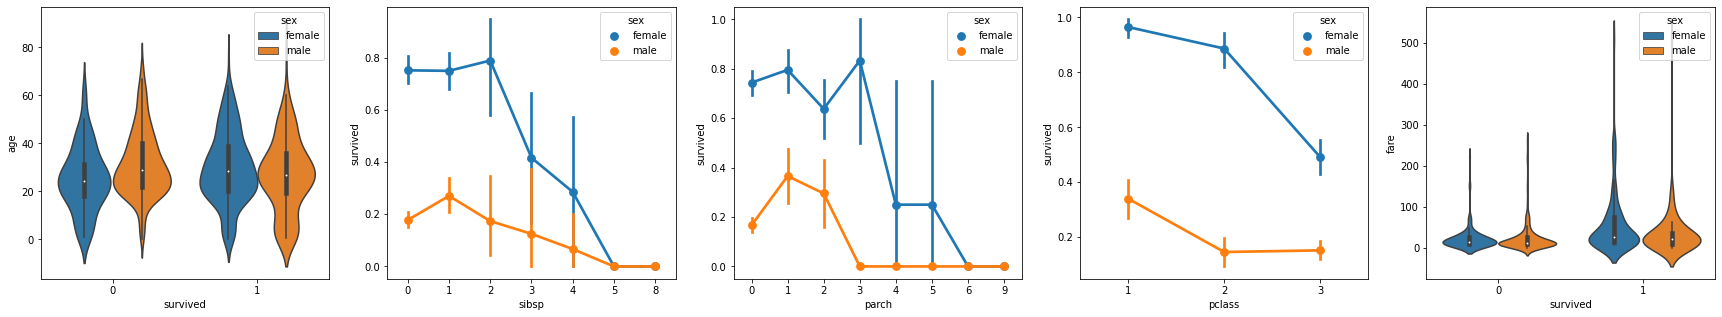

In [4]:
# Visualisoidaan seaborn ja maplotlib kirjastojen avulla eri sarakkeiden
# suhdetta selviytymiseen
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [5]:
# Muutetaan sukupuolen arvot numeerisiksi ja lasketaan
# korrelaatiot muuttujien ja selviytymisen välillä
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
